In [1]:
""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

In [4]:
DATA_FILE = '/home/aschioppa/slr05.xls'

# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [27]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
# Both have the type float32
X = tf.placeholder(tf.float32,name='X')
Y = tf.placeholder(tf.float32, name = 'Y')

In [28]:
# Step 3: create weight and bias, initialized to 0
# name your variables w and b
w = tf.Variable(0,name='w',dtype=tf.float32)
b = tf.Variable(0,name='b',dtype=tf.float32)

In [29]:
# Step 4: predict Y (number of theft) from the number of fire
# name your variable Y_predicted
Y_predicted = w*X + b

In [30]:
# Step 5: use the square error as the loss function
# name your variable loss
loss = tf.square(Y-Y_predicted, name = 'loss')

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(loss)

In [34]:
# Phase 2: Train our model
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())


    # Step 8: train the model
    for i in range(50): # run 100 epochs
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer,loss], feed_dict = {X:x, Y:y})
            total_loss += l#
        print("Epoch {0}: {1}".format(i, total_loss/n_samples))
    w_final,b_final = sess.run([w,b])
    print w_final, b_final

Epoch 0: 2069.6319334
Epoch 1: 2117.0123582
Epoch 2: 2092.302723
Epoch 3: 2068.50804619
Epoch 4: 2045.59118409
Epoch 5: 2023.51464481
Epoch 6: 2002.24476198
Epoch 7: 1981.7483388
Epoch 8: 1961.99444113
Epoch 9: 1942.95201161
Epoch 10: 1924.59308236
Epoch 11: 1906.88988006
Epoch 12: 1889.81645058
Epoch 13: 1873.34713384
Epoch 14: 1857.45884006
Epoch 15: 1842.12787424
Epoch 16: 1827.33249512
Epoch 17: 1813.05205797
Epoch 18: 1799.26608476
Epoch 19: 1785.95621323
Epoch 20: 1773.10248531
Epoch 21: 1760.68912948
Epoch 22: 1748.69841571
Epoch 23: 1737.11386804
Epoch 24: 1725.92087307
Epoch 25: 1715.10462496
Epoch 26: 1704.65009543
Epoch 27: 1694.54471349
Epoch 28: 1684.77463113
Epoch 29: 1675.32845097
Epoch 30: 1666.19353858
Epoch 31: 1657.35840021
Epoch 32: 1648.81226585
Epoch 33: 1640.54407425
Epoch 34: 1632.54468361
Epoch 35: 1624.80433151
Epoch 36: 1617.31268
Epoch 37: 1610.06225325
Epoch 38: 1603.04335572
Epoch 39: 1596.24791761
Epoch 40: 1589.66805633
Epoch 41: 1583.29652426
Epoch 42: 

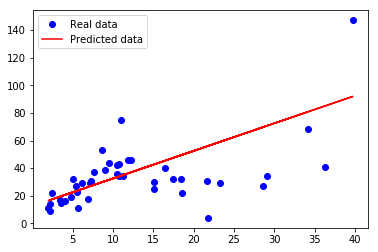

In [35]:
#plot the results
%matplotlib inline
new_X, new_Y = data.T[0], data.T[1]
plt.plot(new_X, new_Y, 'bo', label='Real data')
plt.plot(new_X, new_X * w_final + b_final, 'r', label='Predicted data')
plt.legend()
plt.show()


In [36]:
# let's use huber loss

In [57]:
def huber_loss(labels, predictions, delta=1.0):
    delta = tf.constant(delta,tf.float32)
    residual = tf.subtract(labels,predictions)
    abs_residual = tf.abs(residual)
    small_res = .5 * tf.square(residual)
    large_res = tf.subtract(delta*abs_residual, .5*tf.square(delta))
    
    return tf.where(abs_residual > delta, small_res,  large_res)

In [58]:
huberLoss = huber_loss(Y, Y_predicted)

In [59]:
huberOptimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(huberLoss)

In [61]:
# Phase 2: Train our model
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())


    # Step 8: train the model
    for i in range(50): # run 100 epochs
        total_loss = 0
        for x, y in data:
            _, l = sess.run([huberOptimizer,loss], feed_dict = {X:x, Y:y})
            total_loss += l#
        print("Epoch {0}: {1}".format(i, total_loss/n_samples))
    w_final,b_final = sess.run([w,b])
    print w_final, b_final

Epoch 0: 1025.26030228
Epoch 1: 939.389936989
Epoch 2: 935.149609429
Epoch 3: 931.019002411
Epoch 4: 926.991606231
Epoch 5: 923.06474095
Epoch 6: 919.235555457
Epoch 7: 914.951469224
Epoch 8: 911.330089806
Epoch 9: 907.798389908
Epoch 10: 904.353900828
Epoch 11: 900.994242887
Epoch 12: 897.720732267
Epoch 13: 894.521964577
Epoch 14: 891.378549584
Epoch 15: 888.312045609
Epoch 16: 885.320476947
Epoch 17: 882.401968549
Epoch 18: 879.554415191
Epoch 19: 876.524295773
Epoch 20: 873.830689391
Epoch 21: 871.20229757
Epoch 22: 868.637356983
Epoch 23: 866.134317778
Epoch 24: 863.691880324
Epoch 25: 861.317615252
Epoch 26: 858.995314709
Epoch 27: 856.713835134
Epoch 28: 854.486341893
Epoch 29: 852.310982485
Epoch 30: 850.186992812
Epoch 31: 848.112713445
Epoch 32: 845.955728062
Epoch 33: 844.000408589
Epoch 34: 842.090331838
Epoch 35: 840.224794374
Epoch 36: 838.402189106
Epoch 37: 836.621948146
Epoch 38: 834.882691517
Epoch 39: 833.18282393
Epoch 40: 831.515286233
Epoch 41: 829.887108107
Epoch

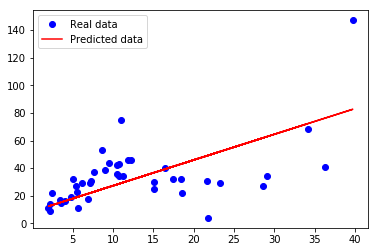

In [62]:
#plot the results
%matplotlib inline
new_X, new_Y = data.T[0], data.T[1]
plt.plot(new_X, new_Y, 'bo', label='Real data')
plt.plot(new_X, new_X * w_final + b_final, 'r', label='Predicted data')
plt.legend()
plt.show()